In [1]:
! pip install numpy pandas matplotlib


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [8]:
customers_df = pd.read_csv('dataset/Customers.csv')

In [9]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [10]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [11]:
customers_df.isna().value_counts()

CustomerID  CustomerName  Region  SignupDate
False       False         False   False         200
Name: count, dtype: int64

#### From Signup-Date we are extracting out the Year

In [12]:
customers_df['Year'] = customers_df['SignupDate'].apply(lambda x: x.split("-")[0])
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate,Year
0,C0001,Lawrence Carroll,South America,2022-07-10,2022
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022
2,C0003,Michael Rivera,South America,2024-03-07,2024
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022
4,C0005,Laura Weber,Asia,2022-08-15,2022


### Grouping the Dataframe region wise to count the number of customers per region

In [13]:
regions_wise_customers=customers_df.groupby('Region')[['CustomerID']].count().reset_index()
regions_wise_customers.head()

,Region,CustomerID
0,Asia,45
1,Europe,50
2,North America,46
3,South America,59


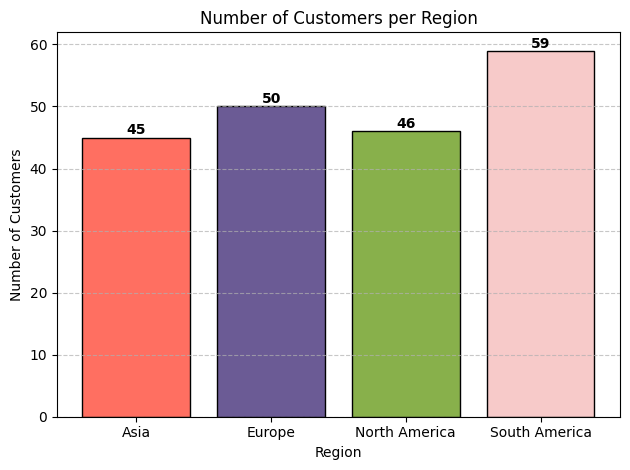

In [14]:
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']
plt.bar(regions_wise_customers['Region'], regions_wise_customers['CustomerID'], color=colors, edgecolor='black')

for index, row in regions_wise_customers.iterrows():
    plt.text(index, row['CustomerID'] + 0.5, str(row['CustomerID']), ha='center', fontsize=10, fontweight='bold', color='black')

plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Region')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Finding the number of customers gained per region and per year wise

In [15]:
region_year_counts = customers_df.groupby(['Region', 'Year'])[['CustomerID']].count().reset_index()
region_year_counts

,Region,Year,CustomerID
0,Asia,2022,13
1,Asia,2023,16
2,Asia,2024,16
3,Europe,2022,16
4,Europe,2023,19
5,Europe,2024,15
6,North America,2022,10
7,North America,2023,8
8,North America,2024,28
9,South America,2022,25


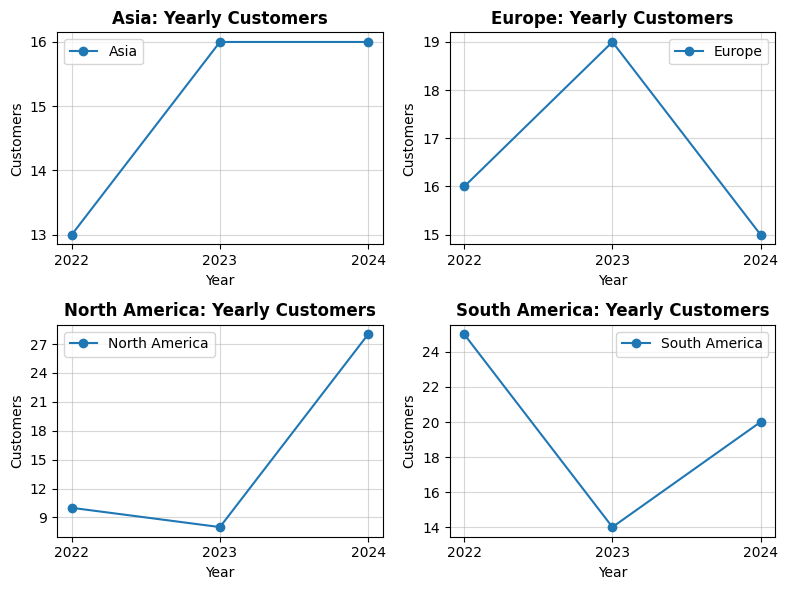

In [16]:
countries = region_year_counts['Region'].unique()
num_countries = len(countries)

ncols = 2
nrows = -(-num_countries // ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 3 * nrows))
axes = axes.flatten() 

for i, country in enumerate(countries):
    subset = region_year_counts[region_year_counts['Region'] == country]
    axes[i].plot(subset['Year'], subset['CustomerID'], marker='o', label=country, color='tab:blue')
    axes[i].set_title(f'{country}: Yearly Customers', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Year', fontsize=10)
    axes[i].set_ylabel('Customers', fontsize=10)
    axes[i].legend()
    axes[i].grid(alpha=0.5)

    axes[i].yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [17]:
customer_per_year = customers_df.groupby(['Year'])[['CustomerID']].count().reset_index()
customer_per_year

,Year,CustomerID
0,2022,64
1,2023,57
2,2024,79


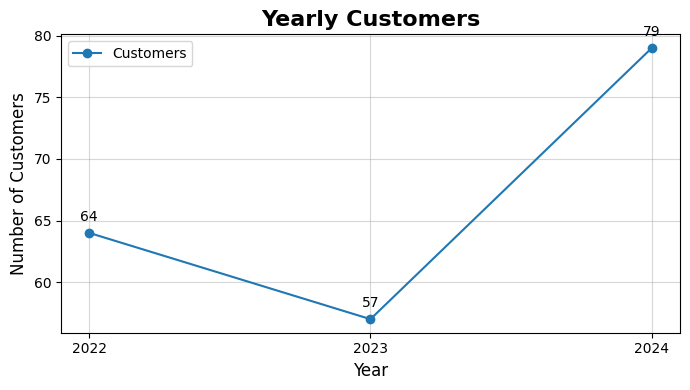

In [18]:
plt.figure(figsize=(7, 4))
plt.plot(customer_per_year['Year'], customer_per_year['CustomerID'], marker='o', linestyle='-', color='tab:blue', label='Customers')

plt.title('Yearly Customers', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(alpha=0.5)

for i in range(len(customer_per_year)):
    plt.text(customer_per_year['Year'][i], customer_per_year['CustomerID'][i] + 1, 
             str(customer_per_year['CustomerID'][i]), ha='center', fontsize=10)

plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [19]:
products_df = pd.read_csv('dataset/Products.csv')
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [20]:
products_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [21]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [16]:
products_df.groupby('Category')['Price'].agg(['mean', 'median', 'std', 'min', 'max'])

,mean,median,std,min,max
Category,,,,,
Books,292.212308,337.94,153.800135,33.59,497.76
Clothing,263.720000,303.50,157.965038,18.82,481.78
Electronics,275.353462,282.72,137.056612,16.08,459.86
Home Decor,235.020000,235.58,122.236552,41.18,454.53


In [17]:
product_category_count = products_df[('Category')].value_counts().reset_index()
product_category_count

,Category,count
0,Books,26
1,Electronics,26
2,Clothing,25
3,Home Decor,23


In [18]:
category_counts = []
categories = product_category_count['Category']
for category in categories:
    category_count = len(products_df[products_df['Category'] == category]['ProductName'].unique().tolist())
    category_counts.append({'Category': category, 'UniqueProductCount': category_count})

category_counts_df = pd.DataFrame(category_counts)
category_counts_df.reset_index(drop=True, inplace=True)
print(category_counts_df.head())


      Category  UniqueProductCount
0        Books                  15
1  Electronics                  18
2     Clothing                  16
3   Home Decor                  17


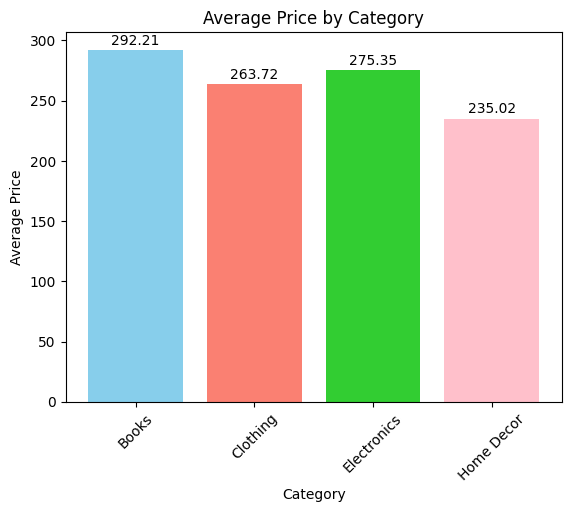

In [19]:
avg_price = products_df.groupby('Category')['Price'].mean()
categories = avg_price.index
values = avg_price.values

plt.bar(categories, values, color=['skyblue', 'salmon', 'limegreen', 'pink'])
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

for i, value in enumerate(values):
    plt.text(i, value + 2, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
for category in categories:
    cheapest_product = products_df[products_df['Category'] == category]['Price'].idxmin()
    costliest_product = products_df[products_df['Category'] == category]['Price'].idxmax()
    
    print(f"Category: {category}")
    print(f"Cheapest Product: {products_df.loc[cheapest_product, 'ProductName']} with Price: {products_df.loc[cheapest_product, 'Price']}")
    print(f"Costliest Product: {products_df.loc[costliest_product, 'ProductName']} with Price: {products_df.loc[costliest_product, 'Price']}")
    print('-' * 40)

Category: Books
Cheapest Product: TechPro Novel with Price: $33.59
Costliest Product: TechPro Textbook with Price: $497.76
----------------------------------------
Category: Clothing
Cheapest Product: ActiveWear Running Shoes with Price: $18.82
Costliest Product: SoundWave T-Shirt with Price: $481.78
----------------------------------------
Category: Electronics
Cheapest Product: SoundWave Smartwatch with Price: $16.08
Costliest Product: SoundWave Smartwatch with Price: $459.86
----------------------------------------
Category: Home Decor
Cheapest Product: HomeSense Rug with Price: $41.18
Costliest Product: ActiveWear Cookware Set with Price: $454.53
----------------------------------------


In [21]:
transactions_df = pd.read_csv('dataset/Transactions.csv')
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [24]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [45]:
per_customer_transactions = transactions_df.groupby('CustomerID')['TransactionID'].count().reset_index().sort_values('TransactionID', ascending=False)
per_customer_transactions.head(6)

,CustomerID,TransactionID
108,C0109,11
155,C0156,11
7,C0008,10
174,C0175,10
140,C0141,10
64,C0065,10


In [46]:
total_value_per_customer = transactions_df.groupby('CustomerID')['TotalValue'].sum().reset_index().sort_values('TotalValue', ascending=False)
total_value_per_customer.head(6)

,CustomerID,TotalValue
140,C0141,10673.87
53,C0054,8040.39
64,C0065,7663.70
155,C0156,7634.45
81,C0082,7572.91
186,C0188,7111.32


In [47]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate,Year
0,C0001,Lawrence Carroll,South America,2022-07-10,2022
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022
2,C0003,Michael Rivera,South America,2024-03-07,2024
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022
4,C0005,Laura Weber,Asia,2022-08-15,2022


In [51]:
most_spending_customers = pd.merge(total_value_per_customer, customers_df, on='CustomerID', how='inner')
most_spending_customers

,CustomerID,TotalValue,CustomerName,Region,SignupDate,Year
0,C0141,10673.87,Paul Parsons,Europe,2023-02-23,2023
1,C0054,8040.39,Bruce Rhodes,Asia,2024-09-29,2024
2,C0065,7663.70,Gerald Hines,North America,2024-07-10,2024
3,C0156,7634.45,William Adams,North America,2023-08-19,2023
4,C0082,7572.91,Aimee Taylor,South America,2022-05-13,2022
...,...,...,...,...,...,...
194,C0014,318.66,Deborah Wilcox,Europe,2024-06-22,2024
195,C0151,223.96,Amber Gonzalez,South America,2024-11-22,2024
196,C0097,137.54,Tina Ford,Asia,2023-12-18,2023
197,C0033,132.64,Tyler Holt,North America,2024-08-04,2024


In [61]:
top5_customers = most_spending_customers['CustomerName'].head(5).tolist()
top5_customer_values = most_spending_customers['TotalValue'].head(5).tolist()
top5_customer_values = [round(value, 2) for value in top5_customer_values]
print(top5_customers)
print(top5_customer_values)

['Paul Parsons', 'Bruce Rhodes', 'Gerald Hines', 'William Adams', 'Aimee Taylor']
[10673.87, 8040.39, 7663.7, 7634.45, 7572.91]


In [63]:
region_vs_total_spend = most_spending_customers.groupby('Region')['TotalValue'].sum().reset_index().sort_values('TotalValue', ascending=False)
region_vs_total_spend

,Region,TotalValue
3,South America,219352.56
1,Europe,166254.63
2,North America,152313.40
0,Asia,152074.97


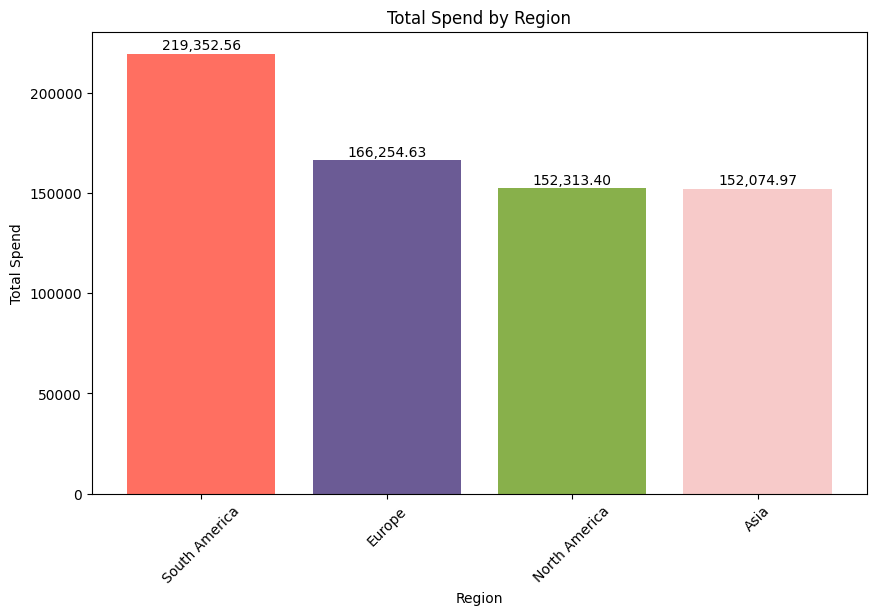

In [69]:
regions = region_vs_total_spend['Region']
total_spend = region_vs_total_spend['TotalValue']

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, total_spend, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, f'{yval:,.2f}', ha='center', va='bottom')

plt.title('Total Spend by Region')
plt.xlabel('Region')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.show()

In [70]:
most_spending_customers.head()

,CustomerID,TotalValue,CustomerName,Region,SignupDate,Year
0,C0141,10673.87,Paul Parsons,Europe,2023-02-23,2023
1,C0054,8040.39,Bruce Rhodes,Asia,2024-09-29,2024
2,C0065,7663.70,Gerald Hines,North America,2024-07-10,2024
3,C0156,7634.45,William Adams,North America,2023-08-19,2023
4,C0082,7572.91,Aimee Taylor,South America,2022-05-13,2022


In [72]:
most_spending_customers['Month'] = most_spending_customers['SignupDate'].apply(lambda x: x.split("-")[1])
most_spending_customers.head()

,CustomerID,TotalValue,CustomerName,Region,SignupDate,Year,Month
0,C0141,10673.87,Paul Parsons,Europe,2023-02-23,2023,02
1,C0054,8040.39,Bruce Rhodes,Asia,2024-09-29,2024,09
2,C0065,7663.70,Gerald Hines,North America,2024-07-10,2024,07
3,C0156,7634.45,William Adams,North America,2023-08-19,2023,08
4,C0082,7572.91,Aimee Taylor,South America,2022-05-13,2022,05


In [73]:
most_spending_customers['Year-Month'] = most_spending_customers['SignupDate'].apply(lambda x: x.split("-")[0] + "-" + x.split("-")[1])
most_spending_customers.head()

,CustomerID,TotalValue,CustomerName,Region,SignupDate,Year,Month,Year-Month
0,C0141,10673.87,Paul Parsons,Europe,2023-02-23,2023,02,2023-02
1,C0054,8040.39,Bruce Rhodes,Asia,2024-09-29,2024,09,2024-09
2,C0065,7663.70,Gerald Hines,North America,2024-07-10,2024,07,2024-07
3,C0156,7634.45,William Adams,North America,2023-08-19,2023,08,2023-08
4,C0082,7572.91,Aimee Taylor,South America,2022-05-13,2022,05,2022-05


In [75]:
monthly_sale = most_spending_customers.groupby('Month')['TotalValue'].sum().reset_index()
monthly_sale

,Month,TotalValue
0,01,50971.95
1,02,70454.96
2,03,68098.04
3,04,84116.69
4,05,71323.34
5,06,43827.10
6,07,40860.92
7,08,32074.39
8,09,70042.44
9,10,52988.68


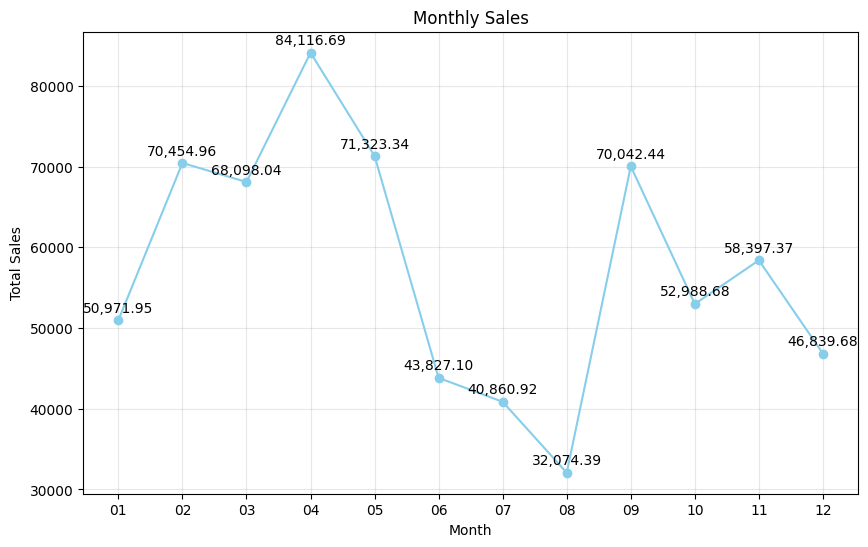

In [77]:
months = monthly_sale['Month']
total_sales = monthly_sale['TotalValue']

plt.figure(figsize=(10, 6))
plt.plot(months, total_sales, marker='o', color='skyblue', linestyle='-')

for i, value in enumerate(total_sales):
    plt.text(i, value + 1000, f'{value:,.2f}', ha='center')

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(alpha=0.3)
plt.show()
